### Predicting Customer Churn

In [3]:
#import modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [4]:
#import data 
sheet_name = 'vw_ChurnData'
churn_df = pd.read_excel('ML_data.xlsx', sheet_name = sheet_name)

In [5]:
churn_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [6]:
churn_df.dtypes

Customer_ID                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_Referrals              int64
Tenure_in_Months                 int64
Value_Deal                      object
Phone_Service                   object
Multiple_Lines                  object
Internet_Service                object
Internet_Type                   object
Online_Security                 object
Online_Backup                   object
Device_Protection_Plan          object
Premium_Support                 object
Streaming_TV                    object
Streaming_Movies                object
Streaming_Music                 object
Unlimited_Data                  object
Contract                        object
Paperless_Billing               object
Payment_Method                  object
Monthly_Charge                 float64
Total_Charges                  float64
Total_Refunds            

In [8]:
#select the object for categorical encoding 
cat_col = churn_df.select_dtypes(include = 'object')

In [9]:
cat_col

,Customer_ID,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,...,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,Yes,Madhya Pradesh,Deal 1,Yes,No,Yes,Fiber Optic,Yes,...,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,Stayed,Others,Others
1,11114-PUN,Male,No,Punjab,Deal 5,Yes,No,Yes,DSL,No,...,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,Yes,West Bengal,Deal 1,Yes,Yes,Yes,Fiber Optic,Yes,...,Yes,Yes,Yes,No,Two Year,Yes,Bank Withdrawal,Stayed,Others,Others
3,11179-MAH,Male,No,Maharashtra,None,Yes,No,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,Stayed,Others,Others
4,11180-TAM,Male,Yes,Tamil Nadu,Deal 2,Yes,No,Yes,DSL,Yes,...,Yes,Yes,No,No,Two Year,Yes,Credit Card,Stayed,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,98053-TAM,Male,Yes,Tamil Nadu,None,Yes,No,No,None,No,...,No,No,No,No,Month-to-Month,No,Credit Card,Stayed,Others,Others
6003,98056-CHH,Female,Yes,Chhattisgarh,Deal 4,Yes,No,No,None,No,...,No,No,No,No,Month-to-Month,No,Bank Withdrawal,Stayed,Others,Others
6004,98058-MAH,Female,No,Maharashtra,None,Yes,Yes,No,None,No,...,No,No,No,No,One Year,No,Bank Withdrawal,Churned,Attitude,Attitude of support person
6005,98098-TAM,Female,No,Tamil Nadu,Deal 1,Yes,Yes,Yes,DSL,Yes,...,No,No,No,Yes,One Year,Yes,Credit Card,Stayed,Others,Others


In [10]:
int_col = churn_df.select_dtypes(exclude = 'object')

In [11]:
int_col

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,30,0,31,95.099998,6683.399902,0.00,0,631.719971,7315.120117
1,51,5,9,49.150002,169.050003,0.00,10,122.370003,301.420013
2,43,3,28,116.050003,8297.500000,42.57,110,1872.979980,10237.910156
3,35,10,12,84.400002,5969.299805,0.00,0,219.389999,6188.689941
4,75,12,27,72.599998,4084.350098,0.00,140,332.079987,4556.430176
...,...,...,...,...,...,...,...,...,...
6002,26,6,22,20.250000,144.350006,0.00,0,279.859985,424.209991
6003,44,15,25,19.250000,375.250000,0.00,0,960.599976,1335.849976
6004,62,3,21,24.900000,1334.000000,0.00,0,144.479996,1478.479980
6005,73,0,5,-8.000000,4174.350098,0.00,0,2407.679932,6582.029785


In [15]:
#drop customer Id and churn reason as those are highly correlated with churn status
cat_col.drop(['Churn_Reason', 'Churn_Category', 'Customer_ID'], inplace = True, axis = 1)

In [17]:
cat_col.head(3)

,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Customer_Status
0,Female,Yes,Madhya Pradesh,Deal 1,Yes,No,Yes,Fiber Optic,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,Stayed
1,Male,No,Punjab,Deal 5,Yes,No,Yes,DSL,No,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,Churned
2,Female,Yes,West Bengal,Deal 1,Yes,Yes,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Two Year,Yes,Bank Withdrawal,Stayed


In [18]:
#get the target data from the cat_col df

target = cat_col.pop('Customer_Status')

In [19]:
target.head(3)

0     Stayed
1    Churned
2     Stayed
Name: Customer_Status, dtype: object

In [26]:
#map the target data 
target = target.map({'Stayed':0,'Churned':1})

In [27]:
target.value_counts()

0    4275
1    1732
Name: Customer_Status, dtype: int64

### Encode the Categorical Data

In [28]:
cat_copy = cat_col.copy()
label_encoders = {}
for column in list(cat_copy):
    label_encoders[column] = LabelEncoder()
    cat_copy[column] = label_encoders[column].fit_transform(cat_copy[column])

In [29]:
cat_copy.head(3)

,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method
0,0,1,11,0,1,0,1,2,1,1,0,1,0,1,1,1,2,0,0
1,1,0,15,4,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,21,0,1,1,1,2,1,1,1,1,1,1,1,0,2,1,0


In [31]:
#combine the data back with the integer data 
ml_df = pd.concat([cat_copy,int_col], axis = 1)

In [32]:
ml_df.head(3)

,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,...,Payment_Method,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,1,11,0,1,0,1,2,1,1,...,0,30,0,31,95.099998,6683.399902,0.00,0,631.719971,7315.120117
1,1,0,15,4,1,0,1,1,0,0,...,0,51,5,9,49.150002,169.050003,0.00,10,122.370003,301.420013
2,0,1,21,0,1,1,1,2,1,1,...,0,43,3,28,116.050003,8297.500000,42.57,110,1872.979980,10237.910156


In [33]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(ml_df, target, test_size=0.2, random_state=42)

In [34]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[762  60]
 [130 250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       822
           1       0.81      0.66      0.72       380

    accuracy                           0.84      1202
   macro avg       0.83      0.79      0.81      1202
weighted avg       0.84      0.84      0.84      1202



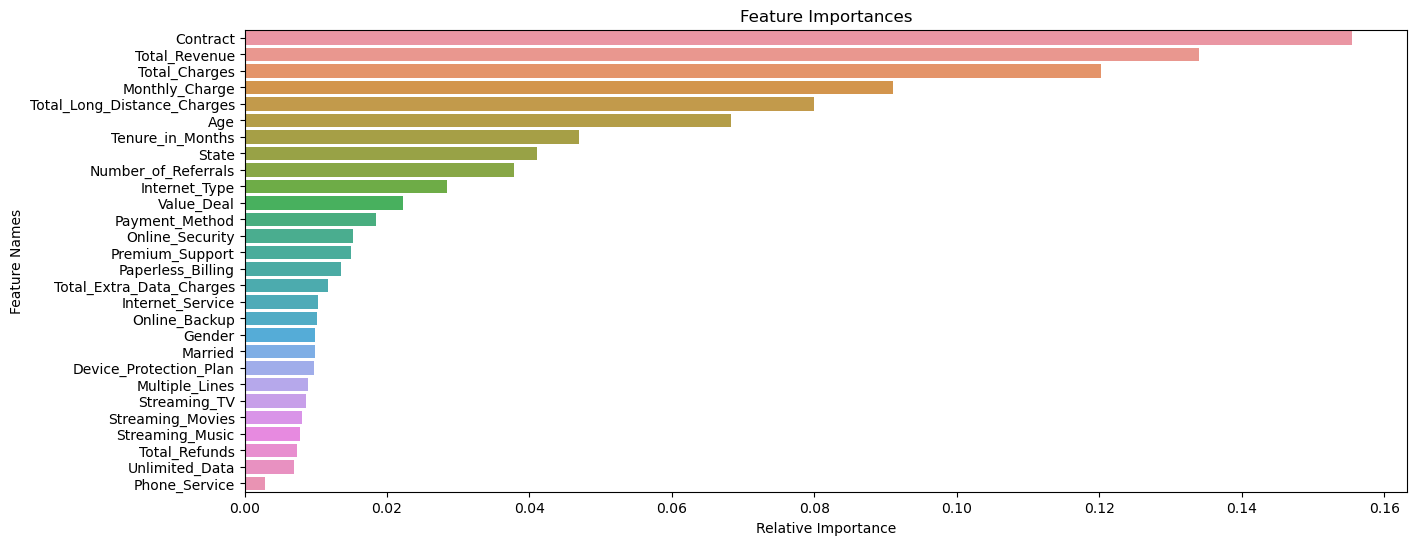

In [36]:
# Make predictions

y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=ml_df.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [ ]:
#pretty poor result in general, especially when predicting churning of customers
#Only 66 percent of the churned customers were predicted. 
#This is probably because of a bit of a class imbalance.

### Predict on a New Data

In [48]:
# Define the path to the Joiner Data Excel file
# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame

new_df = pd.read_excel('ML_data.xlsx', sheet_name=sheet_name)

# Display the first few rows of the fetched data

new_df.head(3)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19811-MAH,Female,35,Yes,Maharashtra,10,7,Deal 5,Yes,No,...,Bank Withdrawal,89.849998,248.399994,0.0,0,99.900002,348.299988,Joined,Others,Others
1,19837-TAM,Female,57,Yes,Tamil Nadu,4,6,None,No,No,...,Bank Withdrawal,51.400002,96.800003,0.0,0,0.000000,96.800003,Joined,Others,Others
2,19898-HAR,Male,31,Yes,Haryana,3,30,Deal 5,Yes,No,...,Credit Card,19.450001,19.450001,0.0,0,29.150000,48.599998,Joined,Others,Others


In [49]:
new_cat = new_df.select_dtypes(include = 'object')

In [50]:
new_int = new_df.select_dtypes(exclude = 'object')

In [52]:
new_cat.head(3)

,Customer_ID,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,...,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Customer_Status,Churn_Category,Churn_Reason
0,19811-MAH,Female,Yes,Maharashtra,Deal 5,Yes,No,Yes,Fiber Optic,Yes,...,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,Joined,Others,Others
1,19837-TAM,Female,Yes,Tamil Nadu,None,No,No,Yes,Cable,No,...,Yes,Yes,Yes,Yes,Month-to-Month,No,Bank Withdrawal,Joined,Others,Others
2,19898-HAR,Male,Yes,Haryana,Deal 5,Yes,No,No,None,No,...,No,No,No,No,Month-to-Month,No,Credit Card,Joined,Others,Others


In [53]:
Id = new_cat.pop('Customer_ID')

In [54]:
#encode cat data
new_cat_copy = new_cat.copy()
label_encoders = {}
for column in list(new_cat_copy):
    label_encoders[column] = LabelEncoder()
    new_cat_copy[column] = label_encoders[column].fit_transform(new_cat_copy[column])

In [55]:
#combine the data back with the integer data 
ml_df_new = pd.concat([new_cat_copy,new_int], axis = 1)

In [58]:
new_cat_copy.drop(['Customer_Status','Churn_Category','Churn_Reason'], inplace = True, axis = 1)
new_cat_copy.head(3)

,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method
0,0,1,12,0,1,0,1,2,1,1,0,0,1,0,0,1,0,0,0
1,0,1,17,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,0
2,1,1,6,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1


In [59]:
#combine the data back with the integer data 
ml_df_new = pd.concat([new_cat_copy,new_int], axis = 1)

In [60]:
ml_df_new.head(3)

,Gender,Married,State,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,...,Payment_Method,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,1,12,0,1,0,1,2,1,1,...,0,35,10,7,89.849998,248.399994,0.0,0,99.900002,348.299988
1,0,1,17,1,0,0,1,0,0,1,...,0,57,4,6,51.400002,96.800003,0.0,0,0.000000,96.800003
2,1,1,6,0,1,0,0,3,0,0,...,1,31,3,30,19.450001,19.450001,0.0,0,29.150000,48.599998


In [62]:
# Make predictions

new_predictions = rf_model.predict(ml_df_new)

# Add predictions to the original DataFrame
original_data = pd.read_excel('ML_data.xlsx', sheet_name=sheet_name)

original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
original_data.head(3)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,19811-MAH,Female,35,Yes,Maharashtra,10,7,Deal 5,Yes,No,...,89.849998,248.399994,0.0,0,99.900002,348.299988,Joined,Others,Others,1
1,19837-TAM,Female,57,Yes,Tamil Nadu,4,6,None,No,No,...,51.400002,96.800003,0.0,0,0.000000,96.800003,Joined,Others,Others,1
2,19898-HAR,Male,31,Yes,Haryana,3,30,Deal 5,Yes,No,...,19.450001,19.450001,0.0,0,29.150000,48.599998,Joined,Others,Others,1


In [63]:
# Save the results
original_data.to_csv("Predictions.csv", index=False)